<a href="https://colab.research.google.com/github/Sahil170595/CCPhotosearchbot/blob/main/Assignment1_MaximumLikelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


# Theoretical Background

## The Exponential Distribution
The exponential distribution models the time between events in a Poisson process.
Its probability density function (PDF) is:

$$
f(x;\lambda) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

where:
- lambda is the rate parameter (events per unit time)
- \( x \) is the time between events
- The mean (expected value) is$$  E[X] = \frac{1}{\lambda} $$

## Maximum Likelihood Estimation
For a set of independent observations \( X = \{x_1, ..., x_n\} \), the likelihood function is:

$$
L(\lambda; X) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}
$$

The negative log-likelihood (our objective function to minimize) is:

$$
-\ell(\lambda; X) = -n \ln(\lambda) + \lambda \sum_{i=1}^{n} x_i
$$

The gradient with respect to \( \lambda \) is:

$$
\frac{\partial (-\ell)}{\partial \lambda} = -\frac{n}{\lambda} + \sum_{i=1}^{n} x_i
$$


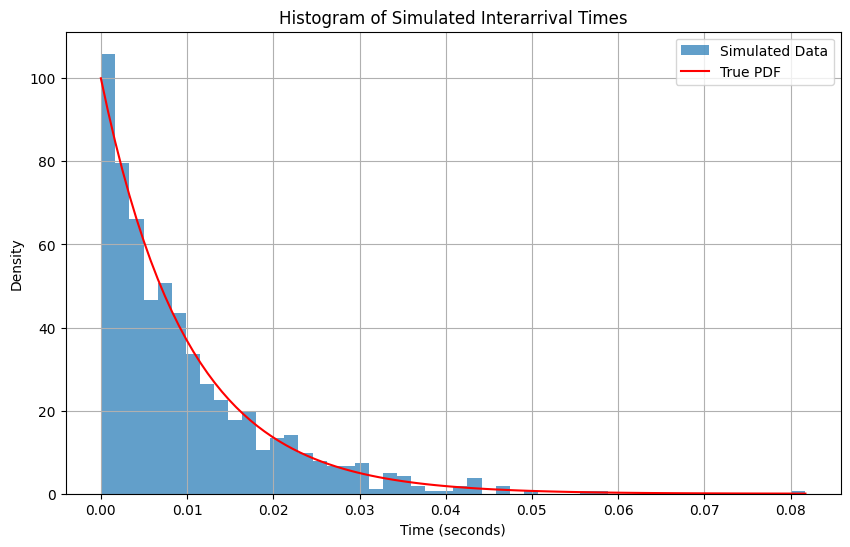

In [7]:
# Task 1: Simulate Exponential Distribution Data

def simulate_exponential(lambda_rate, n_samples=1000):
    """
    Simulate interarrival times from exponential distribution

    Parameters:
    lambda_rate: rate parameter (average number of events per unit time)
    n_samples: number of samples to generate

    Returns:
    Array of interarrival times
    """
    return np.random.exponential(scale=1/lambda_rate, size=n_samples)

# Generate sample data
true_lambda = 100  # rate parameter (100 calls per second)
data = simulate_exponential(true_lambda)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.7, label='Simulated Data')

# Plot true PDF
x = np.linspace(0, max(data), 100)
pdf = true_lambda * np.exp(-true_lambda * x)
plt.plot(x, pdf, 'r-', label='True PDF')

plt.title('Histogram of Simulated Interarrival Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Iteration 100, Lambda: 1.73, Loss: -528.90
Iteration 200, Lambda: 2.22, Loss: -777.27
Iteration 300, Lambda: 2.63, Loss: -940.00
Iteration 400, Lambda: 2.97, Loss: -1060.89
Iteration 500, Lambda: 3.28, Loss: -1157.06
Iteration 600, Lambda: 3.57, Loss: -1236.83
Iteration 700, Lambda: 3.83, Loss: -1304.88
Iteration 800, Lambda: 4.07, Loss: -1364.21
Iteration 900, Lambda: 4.30, Loss: -1416.76
Iteration 1000, Lambda: 4.52, Loss: -1463.90


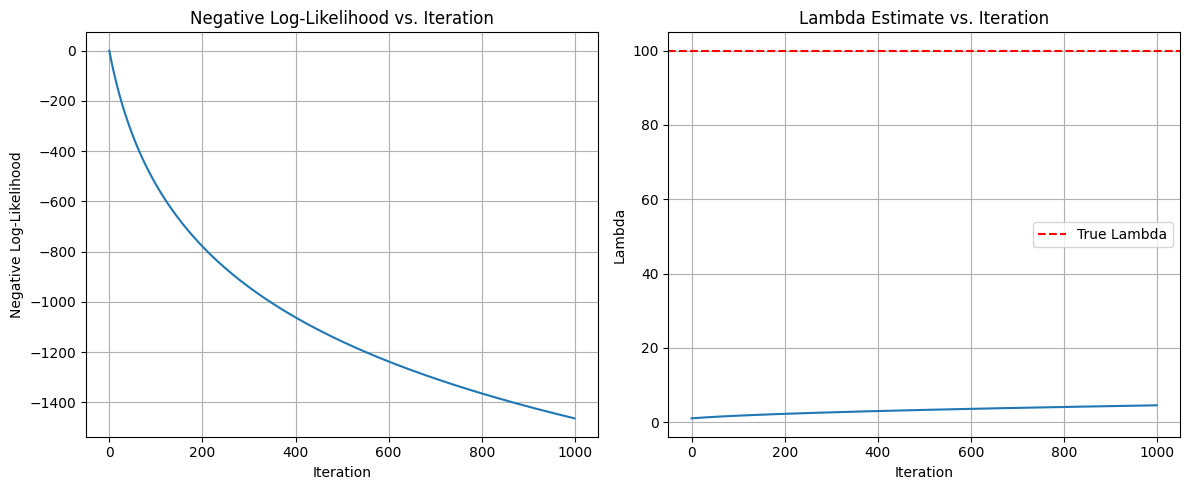


Final Results:
True lambda: 100
Estimated lambda: 4.52
Final negative log-likelihood: -1463.90


In [5]:
# Task 2: SGD Implementation for MLE

def negative_log_likelihood(lambda_param, data):
    """Compute negative log-likelihood for exponential distribution"""
    return -np.sum(np.log(lambda_param) - lambda_param * data)

def gradient_nll(lambda_param, data):
    """Compute gradient of negative log-likelihood"""
    return -len(data)/lambda_param + np.sum(data)

def sgd_exponential_mle(data, learning_rate=0.0001, n_iterations=1000, batch_size=100):
    """Estimate lambda using SGD"""
    lambda_est = 1.0  # Initial guess
    lambda_history = []
    loss_history = []

    for i in range(n_iterations):
        # Randomly sample a batch
        batch_indices = np.random.choice(len(data), batch_size)
        batch = data[batch_indices]

        # Compute gradient and update parameter
        gradient = gradient_nll(lambda_est, batch)
        lambda_est -= learning_rate * gradient

        # Store history
        lambda_history.append(lambda_est)
        loss_history.append(negative_log_likelihood(lambda_est, data))

        if (i+1) % 100 == 0:
            print(f"Iteration {i+1}, Lambda: {lambda_est:.2f}, Loss: {loss_history[-1]:.2f}")

    return lambda_est, lambda_history, loss_history

# Run optimization
final_lambda, lambda_history, loss_history = sgd_exponential_mle(data)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Loss over iterations
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Negative Log-Likelihood vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.grid(True)

# Plot 2: Lambda parameter over iterations
plt.subplot(1, 2, 2)
plt.plot(lambda_history)
plt.axhline(y=true_lambda, color='r', linestyle='--', label='True Lambda')
plt.title('Lambda Estimate vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Lambda')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("\nFinal Results:")
print(f"True lambda: {true_lambda}")
print(f"Estimated lambda: {final_lambda:.2f}")
print(f"Final negative log-likelihood: {loss_history[-1]:.2f}")
